## Loading and Preprocessing

In [41]:
# Import necessary libraries:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the Iris dataset:
iris = load_iris()

# Convert it to a DataFrame:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species column for reference

In [18]:
# Drop the species column:
preprocessed_data = iris_df.drop('species', axis=1)

In [22]:
# Display the first few rows of the dataset:
print(preprocessed_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Clustering Algorithm Implementation

### A. KMeans Clustering
**KMeans Clustering:**
KMeans is a centroid-based clustering algorithm that partitions the data into k clusters. It iteratively assigns points to clusters based on the shortest Euclidean distance to the cluster centroid, then updates centroids by calculating the mean of points in each cluster.

**Why it's suitable:**
Iris data consists of numeric features, which makes it a good candidate for centroid-based algorithms like KMeans.

C:\Users\suvid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


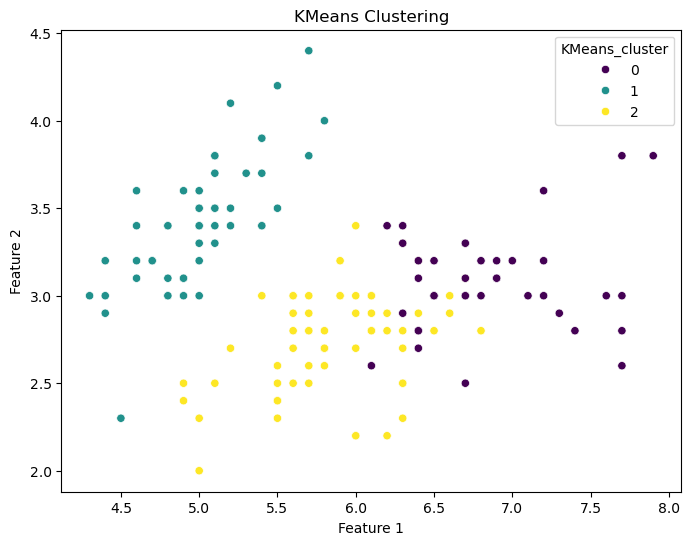

In [26]:
# Import KMeans:
from sklearn.cluster import KMeans
import numpy as np

# Initialize and fit the KMeans model:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(preprocessed_data)

# Add cluster labels to the dataset for visualization:
iris_df['KMeans_cluster'] = kmeans_labels

# Visualize the clusters (e.g., using the first two features):
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=preprocessed_data.iloc[:, 0], 
    y=preprocessed_data.iloc[:, 1], 
    hue=iris_df['KMeans_cluster'], 
    palette='viridis'
)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### B. Hierarchical Clustering
**Hierarchical Clustering:**
Hierarchical clustering creates a tree-like structure of clusters by either merging smaller clusters into larger ones (agglomerative) or splitting larger clusters into smaller ones (divisive). Agglomerative clustering is the most commonly used.

**Why it's suitable:**
Hierarchical clustering is particularly useful when the number of clusters is unknown and we want to visualize the relationships between clusters.

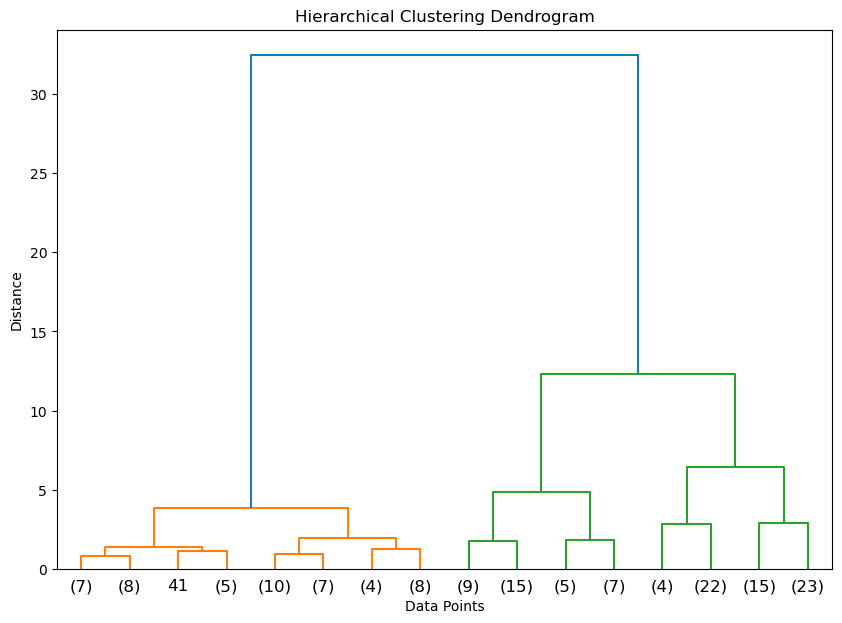

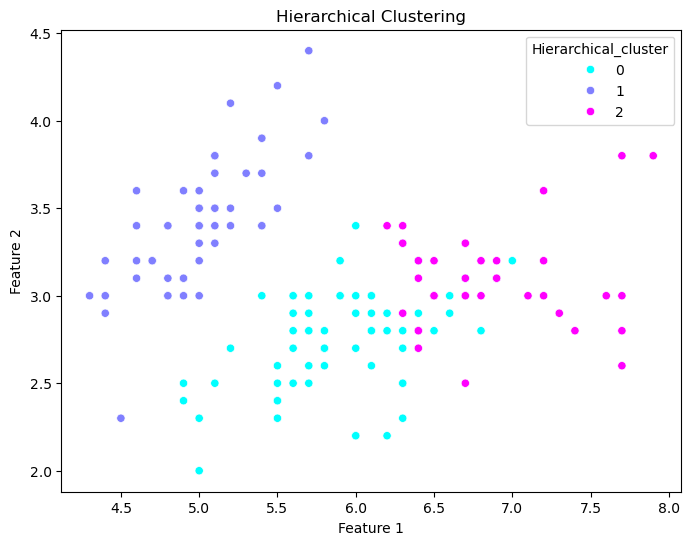

In [37]:
# Import necessary libraries for hierarchical clustering:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix:
linkage_matrix = linkage(preprocessed_data, method='ward')

# Plot the dendrogram:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering:
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(preprocessed_data)

# Add cluster labels to the dataset for visualization:
iris_df['Hierarchical_cluster'] = hierarchical_labels

# Visualize the clusters:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=preprocessed_data.iloc[:, 0], 
    y=preprocessed_data.iloc[:, 1], 
    hue=iris_df['Hierarchical_cluster'], 
    palette='cool'
)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()